# Amazon review

Classifier

In [44]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import re

In [2]:
# Load train and test data
df_train = pd.read_csv('amazon_reviews/train.csv')
df_test = pd.read_csv('amazon_reviews/test.csv')

In [8]:
# Rename the columns
columns = ['polarity','title','text']

df_train.columns = columns
df_test.columns = columns

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [94]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399989 entries, 0 to 399998
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  399989 non-null  int64 
 1   title     399989 non-null  object
 2   text      399989 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.2+ MB


In [27]:
print(f"Training set shape:  {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape:  (3599922, 3)
Test set shape: (399989, 3)


In [20]:
# Check for missing values
print(df_train.isnull().any())
print(df_test.isnull().any())

polarity    False
title        True
text        False
dtype: bool
polarity    False
title        True
text        False
dtype: bool


In [26]:
# Remove missing values
df_train = df_train.dropna()
df_test = df_test.dropna()

In [28]:
print(f"Training set shape:  {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape:  (3599922, 3)
Test set shape: (399989, 3)


In [104]:
df_train.head()

,polarity,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [105]:
df_test.head()

,polarity,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


### Get target and features

In [135]:
train_text = df_train.drop(['polarity','title'], axis=1)
train_label = df_train['polarity']
#text_clean.text.apply(lambda x : re.sub(r"[^a-zA-Z0-9]", " ", x.lower()))

In [136]:
train_text.shape

(3599922, 1)

### Bag of words

In [137]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [159]:
# Feature extraction
vect = CountVectorizer()

In [160]:
bag_of_words = vect.fit_transform(train_text.text)

In [142]:
vect.get_feature_names()

C:\Users\vite_\Documents\Python_git\virtual\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '00000000',
 '000000000',
 '0000000000',
 '000000000000',
 '0000000000000',
 '0000000000000000000000000000000000000000000',
 '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001',
 '00000000000000000000000000001',
 '000000000000000000000000008',
 '00000000000000000001got',
 '00000000000000001',
 '0000000000000001overall',
 '0000000000001',
 '000000000001',
 '00000000001',
 '00000000046566128',
 '000000001',
 '00000000h',
 '00000001',
 '000000018',
 '0000000933333333333333',
 '0000000yeah',
 '0000001',
 '00000012',
 '000000266666666666667',
 '000000x',
 '000001difficulty',
 '00000579',
 '00001',
 '000010',
 '0000137',
 '00001a',
 '00002',
 '000027',
 '00003',
 '000041',
 '00005',
 '000056',
 '000059',
 '00006',
 '000074',
 '00008',
 '000083',
 '000084',
 '0000bytes',
 '0000k',
 '0001',
 '00010',
 '000100',
 '00010246ebx',
 '000115cr',
 '00

In [143]:
vect.vocabulary_

{'reading': 679642,
 'lot': 502229,
 'of': 589501,
 'reviews': 701352,
 'saying': 724912,
 'that': 823120,
 'this': 832013,
 'is': 442494,
 'the': 823880,
 'best': 123215,
 'game': 351919,
 'soundtrack': 771998,
 'and': 72022,
 'figured': 327258,
 'write': 921223,
 'review': 701140,
 'to': 840144,
 'disagree': 255851,
 'bit': 128836,
 'in': 423772,
 'my': 562515,
 'opinino': 598200,
 'yasunori': 926540,
 'mitsuda': 545133,
 'ultimate': 862999,
 'masterpiece': 521910,
 'music': 560722,
 'timeless': 837435,
 'been': 117792,
 'listening': 495808,
 'it': 444751,
 'for': 337262,
 'years': 927026,
 'now': 583064,
 'its': 446075,
 'beauty': 116514,
 'simply': 753744,
 'refuses': 688420,
 'fade': 316713,
 'price': 653833,
 'tag': 810429,
 'on': 594735,
 'pretty': 653241,
 'staggering': 781877,
 'must': 561515,
 'say': 724796,
 'but': 153333,
 'if': 418042,
 'you': 929265,
 'are': 85793,
 'going': 366138,
 'buy': 154292,
 'any': 79614,
 'cd': 169917,
 'much': 557559,
 'money': 549077,
 'only': 

## Model
Implement a logistic regresion using bag of words

In [148]:
from sklearn.linear_model import LogisticRegression

In [150]:
model_log = LogisticRegression(max_iter=10000)
model_log.fit(bag_of_words, train_label)

LogisticRegression(max_iter=10000)

In [163]:
df_test.iloc[0:10]

,polarity,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
5,1,Incorrect Disc,"I love the style of this, but after a couple y..."
6,1,DVD menu select problems,I cannot scroll through a DVD menu that is set...
7,2,Unique Weird Orientalia from the 1930's,"Exotic tales of the Orient from the 1930's. ""D..."
8,1,"Not an ""ultimate guide""","Firstly,I enjoyed the format and tone of the b..."
9,2,Great book for travelling Europe,"I currently live in Europe, and this is the bo..."


In [164]:
test_bag_of_words = vect.transform(df_test.text[0:10])
pred_bal = model_log.predict(test_bag_of_words)
pred_bal

array([2, 1, 1, 2, 1, 1, 1, 2, 2, 2], dtype=int64)

In [166]:
test_bag_of_words = vect.transform(df_test.text)
pred_bal = model_log.predict(test_bag_of_words)

#### Evaluate

In [169]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Confusion matrix
[[176490  23503]
 [ 21806 178190]]
Report
              precision    recall  f1-score   support

           1       0.89      0.88      0.89    199993
           2       0.88      0.89      0.89    199996

    accuracy                           0.89    399989
   macro avg       0.89      0.89      0.89    399989
weighted avg       0.89      0.89      0.89    399989



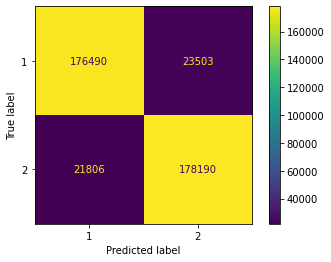

In [170]:
print("Confusion matrix")
print(confusion_matrix(df_test.polarity, pred_bal))
print("Report")
print(classification_report(df_test.polarity, pred_bal))
ConfusionMatrixDisplay.from_predictions(df_test.polarity, pred_bal)

### TF-IDF

In [171]:
vect_tfidf = TfidfVectorizer()

In [172]:
tfidf_words = vect_tfidf.fit_transform(train_text.text)

In [176]:
vect_tfidf.vocabulary_

{'reading': 679642,
 'lot': 502229,
 'of': 589501,
 'reviews': 701352,
 'saying': 724912,
 'that': 823120,
 'this': 832013,
 'is': 442494,
 'the': 823880,
 'best': 123215,
 'game': 351919,
 'soundtrack': 771998,
 'and': 72022,
 'figured': 327258,
 'write': 921223,
 'review': 701140,
 'to': 840144,
 'disagree': 255851,
 'bit': 128836,
 'in': 423772,
 'my': 562515,
 'opinino': 598200,
 'yasunori': 926540,
 'mitsuda': 545133,
 'ultimate': 862999,
 'masterpiece': 521910,
 'music': 560722,
 'timeless': 837435,
 'been': 117792,
 'listening': 495808,
 'it': 444751,
 'for': 337262,
 'years': 927026,
 'now': 583064,
 'its': 446075,
 'beauty': 116514,
 'simply': 753744,
 'refuses': 688420,
 'fade': 316713,
 'price': 653833,
 'tag': 810429,
 'on': 594735,
 'pretty': 653241,
 'staggering': 781877,
 'must': 561515,
 'say': 724796,
 'but': 153333,
 'if': 418042,
 'you': 929265,
 'are': 85793,
 'going': 366138,
 'buy': 154292,
 'any': 79614,
 'cd': 169917,
 'much': 557559,
 'money': 549077,
 'only': 

In [178]:
tfidf_words

<5x937100 sparse matrix of type '<class 'numpy.float64'>'
	with 378 stored elements in Compressed Sparse Row format>

### Model

In [179]:
model_log_tfidf = LogisticRegression(max_iter=10000)
model_log_tfidf.fit(tfidf_words, train_label)

LogisticRegression(max_iter=10000)

In [180]:
test_tfidf = vect.transform(df_test.text)
pred_tfidf = model_log.predict(test_tfidf)

### Evaluate

Confusion matrix
[[176490  23503]
 [ 21806 178190]]
Report
              precision    recall  f1-score   support

           1       0.89      0.88      0.89    199993
           2       0.88      0.89      0.89    199996

    accuracy                           0.89    399989
   macro avg       0.89      0.89      0.89    399989
weighted avg       0.89      0.89      0.89    399989



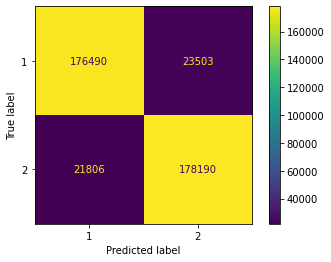

In [181]:
print("Confusion matrix")
print(confusion_matrix(df_test.polarity, pred_tfidf))
print("Report")
print(classification_report(df_test.polarity, pred_tfidf))
ConfusionMatrixDisplay.from_predictions(df_test.polarity, pred_tfidf)